
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [29]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
ha = pd.read_csv("C:\\Users\\young\\OneDrive\\文档\\GSB544\\9-2 Practice Activity\\heart_attack.csv")

In [17]:
ha.head(5)

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


In [18]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      273 non-null    int64
 1   sex      273 non-null    int64
 2   cp       273 non-null    int64
 3   trtbps   273 non-null    int64
 4   chol     273 non-null    int64
 5   restecg  273 non-null    int64
 6   thalach  273 non-null    int64
 7   output   273 non-null    int64
dtypes: int64(8)
memory usage: 17.2 KB


In [13]:
missing_data = ha.isnull().sum()
missing_data

age        0
sex        0
cp         0
trtbps     0
chol       0
restecg    0
thalach    0
output     0
dtype: int64

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [36]:
# multiclass KNN

X = ha[["sex","trtbps", "chol"]]
y = ha["cp"]

ct = ColumnTransformer([
    ("num", StandardScaler(), ["trtbps","chol"]),  
    ("bin", "passthrough", ["sex"]),              
])

knn_model = Pipeline([
    ("prep", ct),
    ("model", KNeighborsClassifier(n_neighbors=5)),
])


cv_scores = cross_val_score(knn_model, X, y,
                          cv=5, scoring="accuracy")
cv_scores.mean()

np.float64(0.3811447811447811)

In [35]:
# Muticlass Decision Tree

dt_model = Pipeline([
    ("prep", ct),
    ("model", DecisionTreeClassifier(random_state=42, max_depth=4)),
])

dt_model.fit(X, y)

cv_scores = cross_val_score(dt_model, X, y,
                          cv=5, scoring="accuracy")
cv_scores.mean()

np.float64(0.4175757575757576)

[Text(0.375, 0.9, 'trtbps <= -0.026\ngini = 0.661\nsamples = 273\nvalue = [128, 44, 81, 20]'),
 Text(0.1111111111111111, 0.7, 'trtbps <= -1.941\ngini = 0.684\nsamples = 149\nvalue = [61, 25, 50, 13]'),
 Text(0.24305555555555555, 0.8, 'True  '),
 Text(0.05555555555555555, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.16666666666666666, 0.5, 'sex <= -1.987\ngini = 0.684\nsamples = 147\nvalue = [61.0, 25.0, 48.0, 13.0]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(0.2222222222222222, 0.3, 'sex <= -0.826\ngini = 0.685\nsamples = 145\nvalue = [61, 25, 46, 13]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.547\nsamples = 26\nvalue = [16, 5, 5, 0]'),
 Text(0.2777777777777778, 0.1, 'gini = 0.698\nsamples = 119\nvalue = [45, 20, 41, 13]'),
 Text(0.6388888888888888, 0.7, 'chol <= 0.5\ngini = 0.619\nsamples = 124\nvalue = [67, 19, 31, 7]'),
 Text(0.5069444444444444, 0.8, '  False'),
 Text(0.5, 0.5, 'sex <= 1.975\ngini = 0.64\nsamples = 48

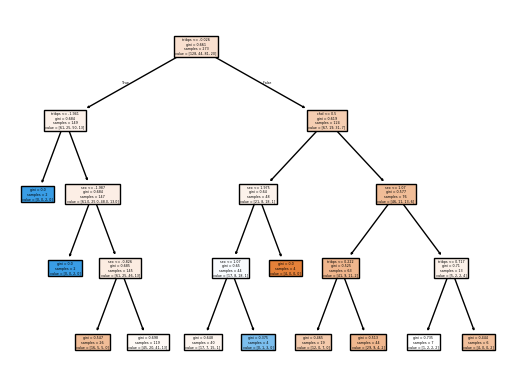

In [48]:
from sklearn.tree import plot_tree

plot_tree(dt_model.named_steps["model"], feature_names=["sex","trtbps", "chol"], filled=True)

Analysis:

Rule: trtbps ≤ -0.026 → trtbps ≤ ~131.6 mmHg
Node counts at root: [cp0, cp1, cp2, cp3] = [128, 44, 81, 20] (n=273)
Left child (low/normal BP, n=149): counts [61, 25, 50, 13]
More cp2 share here (≈33.6%) than the right side.
Right child (higher BP, n=124): counts [67, 19, 31, 7]
Skews toward cp0 (≈54.0%).

Resting BP is the most informative variable at the top. Patients with BP ≤ ~131.6 mmHg behave differently from those above that threshold—lower BP includes more cp2 cases, higher BP leans more cp0.

In [47]:
# muticlass LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='svd')   
lda.fit(X, y)

cv_scores = cross_val_score(lda, X, y,
                          cv=5, scoring="accuracy")
cv_scores.mean()


np.float64(0.43582491582491584)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [56]:
ha["cp_is_3"] = (ha["cp"] == 3).astype(int)

X = ha[["sex","trtbps", "chol"]]
y = ha["cp_is_3"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression())]
)

logistic_model.fit(X, y)

f1_scores = cross_val_score(logistic_model, X, y, cv=5, scoring="f1")
print("Fold F1:", [round(s, 3) for s in f1_scores])
print("Mean F1:", round(f1_scores.mean(), 4))



Fold F1: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
Mean F1: 0.0


In [57]:
def ovr_f1(k):
    y_bin = (ha["cp"] == k).astype(int)
    return cross_val_score(logistic_model, X, y_bin, cv=cv, scoring="f1").mean()

for k in sorted(ha["cp"].unique()):
    print(f"cp == {k}: F1 = {ovr_f1(k):.4f}")


cp == 0: F1 = 0.4169
cp == 1: F1 = 0.0000
cp == 2: F1 = 0.0211
cp == 3: F1 = 0.0000


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [61]:
ha_01 = ha[ha["cp"].isin([0, 1])].copy()

X = ha_01[["sex","trtbps","chol"]]
y = (ha_01["cp"] == 1).astype(int)   


pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

roc_auc = cross_val_score(pipe, X, y, cv=5, scoring="roc_auc").mean()
print("ROC-AUC (0 vs 1):", round(roc_auc, 4))


ROC-AUC (0 vs 1): 0.4182


In [66]:
# 0 vs 2
ha_02 = ha[ha["cp"].isin([0, 2])].copy()
X = ha_02[["sex","trtbps","chol"]]
y = (ha_02["cp"] == 2).astype(int)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

roc_auc_02 = cross_val_score(pipe, X, y, cv=cv, scoring="roc_auc").mean()
print("ROC-AUC (0 vs 2):", round(roc_auc_02, 4))

# 0 vs 3
ha_03 = ha[ha["cp"].isin([0, 3])].copy()
X = ha_03[["sex","trtbps","chol"]]
y = (ha_03["cp"] == 3).astype(int)
roc_auc_03 = cross_val_score(pipe, X, y, cv=5, scoring="roc_auc").mean()
print("ROC-AUC (0 vs 3):", round(roc_auc_03, 4))


ROC-AUC (0 vs 2): 0.5833
ROC-AUC (0 vs 3): 0.6342


Analysis:pair (0, 3) is the best. 